The goal of this ML model is to predict the winners of Premier League matches based on their averages accumulated until the last match. We are looking into all matches from 2010-2021.

We are gonna preprocess the data and find the result for each game (Home win, Away Win, Tie) for each game, then remove the columns that have any game specific information. 

From this preprocessed data, we will make two models, a logistic regreession and a neural network

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


"""PREPROCESSING, METRICS"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder


"""VISUALIZATION"""
import matplotlib.pyplot as plt

"""LOGISTIC REGRESSION IMPORTS"""
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



"""NEURAL NETWORKS"""
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import  Sequential
from tensorflow.keras.utils import plot_model , to_categorical




## Data Preprocessing

In [2]:
"""HELPER FUNCTIONS"""

"""
Mapping for result:
0 = Home Team Win
1 = Away Team Win 
2 = Draw
"""

def map_result(result):
    team1_score, team2_score = map(int, result.split('-'))
    if team1_score > team2_score:
        return 0  # Home wins
    elif team1_score < team2_score:
        return 1  # Away wins
    else:
        return 2  # Draw

In [3]:
"""DATA PREPROCESSING"""

df = pd.read_csv("./Data/df_full_premierleague.csv")

df['result'] = df['result_full'].apply(map_result)
df = df.dropna()
# Dropping Rows with current match stats
columns_to_drop = ['Unnamed: 0',
                   'link_match', 
                   'season', 
                   'date', 
                   'home_team',
                   'away_team',
                   'result_full',
                   'result_ht',
                   'goal_home_ft',
                   'goal_away_ft',
                   'sg_match_ft',
                   'goal_home_ht',
                   'goal_away_ht',
                   'sg_match_ht',
                   'home_clearances',
                   'home_corners',
                   'home_fouls_conceded',
                   'home_offsides',
                   'home_passes',
                   'home_possession',
                   'home_red_cards',
                   'home_shots',
                   'home_shots_on_target',
                   'home_tackles',
                   'home_touches',
                   'home_yellow_cards',
                   'away_clearances',
                   'away_corners',
                   'away_fouls_conceded',
                   'away_offsides',
                   'away_passes',
                   'away_possession',
                   'away_red_cards',
                   'away_shots',
                   'away_shots_on_target',
                   'away_tackles',
                   'away_touches',
                   'away_yellow_cards',
                   ]

df = df.drop(columns=columns_to_drop)



In [4]:
"""SPLITTING UP THE TESTING AND TRAINING DATA"""
df_data = df.drop(columns=['result'])
df_target = df['result']

# print(df_data)
# print('******')
# print(df_target)

X_train, X_test, y_train, y_test =train_test_split(df_data,df_target,test_size=0.2,random_state=42)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (3072, 76)
X_test dimension=  (769, 76)
y_train dimension=  (3072,)
y_train dimension=  (769,)


## Logistic Regression Model

In [5]:
"""DATA FOR LINEAR REGRESSION"""
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
"""LOGISTIC REGRESSION MODEL"""

lr_model = LogisticRegression(multi_class='ovr', solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)



Accuracy: 0.52

Confusion Matrix:
[[273  59  13]
 [114 118   9]
 [129  47   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.79      0.63       345
           1       0.53      0.49      0.51       241
           2       0.24      0.04      0.07       183

    accuracy                           0.52       769
   macro avg       0.43      0.44      0.40       769
weighted avg       0.46      0.52      0.46       769



In [7]:
# coefficients = lr_model.coef_[0]
# intercept = lr_model.intercept_[0]

coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_[0]})
coef_df                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

,Feature,Coefficient
0,clearances_avg_H,-0.075279
1,corners_avg_H,0.018869
2,fouls_conceded_avg_H,-0.119513
3,offsides_avg_H,0.107273
4,passes_avg_H,0.177886
...,...,...
71,sg_match_ft_acum_away,0.222869
72,goals_scored_ht_avg_away,0.158792
73,goals_conced_ht_avg_away,-0.050178
74,sg_match_ht_acum_away,-0.330186


## Multi-Layer Perceptron

In [8]:
"""DATA FOR NEURAL NETWORK"""
X_train, X_test, y_train, y_test =train_test_split(df_data,df_target,test_size=0.2,random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

num_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [12]:
"""CREATING THE NEURAL NETWORK"""
nn_model = Sequential()

nn_model.add(Dense(units=32, input_dim=X_train.shape[1], activation='sigmoid'))
# nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=16, activation='sigmoid'))
nn_model.add(Dense(units=3, activation='softmax'))

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])

nn_model_performance = nn_model.fit(X_train_scaled, y_train_one_hot, epochs=30, batch_size=20, validation_data=(X_test_scaled, y_test_one_hot), verbose=1)


Epoch 1/30
154/154 [==============================] - 0s 1ms/step - loss: 1.0349 - accuracy: 0.4759 - auc: 0.6485 - val_loss: 0.9984 - val_accuracy: 0.5358 - val_auc: 0.6871
Epoch 2/30
154/154 [==============================] - 0s 752us/step - loss: 0.9917 - accuracy: 0.5251 - auc: 0.6920 - val_loss: 0.9911 - val_accuracy: 0.5358 - val_auc: 0.6915
Epoch 3/30
154/154 [==============================] - 0s 713us/step - loss: 0.9834 - accuracy: 0.5212 - auc: 0.7001 - val_loss: 0.9876 - val_accuracy: 0.5345 - val_auc: 0.6957
Epoch 4/30
154/154 [==============================] - 0s 746us/step - loss: 0.9803 - accuracy: 0.5299 - auc: 0.7029 - val_loss: 0.9867 - val_accuracy: 0.5384 - val_auc: 0.6971
Epoch 5/30
154/154 [==============================] - 0s 852us/step - loss: 0.9776 - accuracy: 0.5290 - auc: 0.7056 - val_loss: 0.9860 - val_accuracy: 0.5319 - val_auc: 0.6992
Epoch 6/30
154/154 [==============================] - 0s 831us/step - loss: 0.9737 - accuracy: 0.5326 - auc: 0.7096 - val_

Text(0.5, 0, 'Epochs')

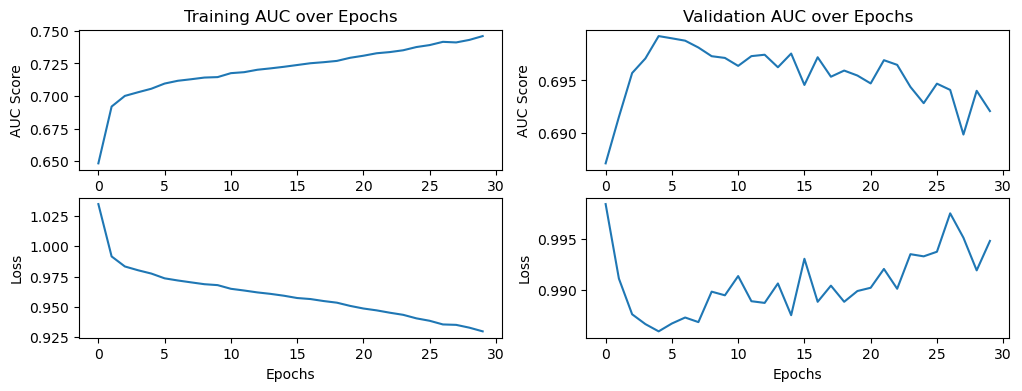

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(2,2,1)
plt.plot(nn_model_performance.history['auc'], label='Training AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC Score')
plt.title('Training AUC over Epochs')

plt.subplot(2,2,2)
plt.plot(nn_model_performance.history['val_auc'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC Score')
plt.title('Validation AUC over Epochs')


plt.subplot(2,2,3)
plt.plot(nn_model_performance.history['loss'] , label='Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(2,2,4)
plt.plot(nn_model_performance.history['val_loss'] , label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

## Random Forests

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf:.4f}')
print(classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 0.5241
              precision    recall  f1-score   support

           0       0.55      0.80      0.65       345
           1       0.52      0.45      0.48       241
           2       0.33      0.10      0.16       183

    accuracy                           0.52       769
   macro avg       0.47      0.45      0.43       769
weighted avg       0.49      0.52      0.48       769

